## Camera

erste version (mit vimba), in der mehrere Bilder ausgelesen und erstmal statt weiterverarbeitet ausgelesen werden 

In [1]:
#Import
from vimba import *
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#save np_array
def save_ar (nr, np_array):
    filename = './test_arrays/' + str(nr) + 'test.npy'
    with open(filename, 'wb') as f:
        np.save(f, np_array)

def open_plot (nr):
    filename = './test_arrays/'+ str(nr) + 'test.npy'
    with open(filename, 'rb') as f:
        ar = np.load(f)
    plt.imshow(ar, cmap='gray')
    plt.show()

mehrere Bilder aufnehmen

In [3]:
#alte version erweitert
'''
with Vimba.get_instance () as vimba:
    cams = vimba.get_all_cameras ()
    if len(cams) > 0:
        with cams [0] as cam:
            frame = cam.get_frame ()
            np_a = frame.as_numpy_ndarray()
            save_ar(1, np_a)
            frame = cam.get_frame ()
            np_a = frame.as_numpy_ndarray()
            save_ar(2, np_a)
    else:
        print("no camera detected")
'''


'\nwith Vimba.get_instance () as vimba:\n    cams = vimba.get_all_cameras ()\n    if len(cams) > 0:\n        with cams [0] as cam:\n            frame = cam.get_frame ()\n            np_a = frame.as_numpy_ndarray()\n            save_ar(1, np_a)\n            frame = cam.get_frame ()\n            np_a = frame.as_numpy_ndarray()\n            save_ar(2, np_a)\n    else:\n        print("no camera detected")\n'

In [4]:
#synchronous_grab.py  example
with Vimba.get_instance () as vimba:
    cams = vimba.get_all_cameras ()
    if len(cams) > 0:
        with cams [0] as cam:
            i = 1
            for frame in cam.get_frame_generator(limit=10, timeout_ms=3000):
                            print('Got {}'.format(frame), flush=True)
                            np_a = frame.as_numpy_ndarray()
                            save_ar(i, np_a)
                            i += 1
    else:
        print("no camera detected")

Got Frame(id=0, status=FrameStatus.Complete, buffer=0x204fed56040)
Got Frame(id=1, status=FrameStatus.Complete, buffer=0x204ff01f040)
Got Frame(id=2, status=FrameStatus.Complete, buffer=0x204ff2e3040)
Got Frame(id=3, status=FrameStatus.Complete, buffer=0x204ff5a4040)
Got Frame(id=4, status=FrameStatus.Complete, buffer=0x204ff86c040)
Got Frame(id=5, status=FrameStatus.Complete, buffer=0x204ffb24040)
Got Frame(id=6, status=FrameStatus.Complete, buffer=0x20480007040)
Got Frame(id=7, status=FrameStatus.Complete, buffer=0x2048058c040)
Got Frame(id=8, status=FrameStatus.Complete, buffer=0x20480844040)
Got Frame(id=9, status=FrameStatus.Complete, buffer=0x20480b0b040)


Bilder anschauen

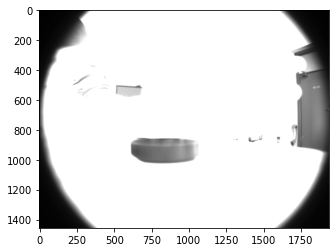

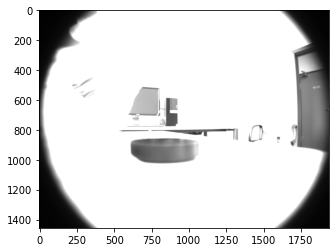

In [6]:
    
open_plot(1)
open_plot(10)